<a href="https://colab.research.google.com/github/abhisheshgupta/abhisheshgupta/blob/main/Sales_Transactions_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

####get the data

In [ ]:
df = pd.read_csv('/content/Sales_Transactions_Dataset_Weekly.csv')

In [ ]:
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [ ]:
df.shape

(811, 107)

##exploratory data analysis

In [ ]:
#get the columns of dataset
df.columns

Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)

In [ ]:
df.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.085000,0.000000,0.10500,0.100000,0.110000,0.090000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,0.280000,0.270000,0.300000,0.310000,0.330000,0.310000,0.33000,0.330000,0.350000,0.430000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,0.490000,0.450000,0.500000,0.500000,0.500000,0.500000,0.50000,0.550000,0.560000,0.670000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
#drop the product_code column
df.drop(columns = 'Product_Code',inplace=True)

In [ ]:
#mean of all the columns
mean = list(np.mean(df[i]) for i in df.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


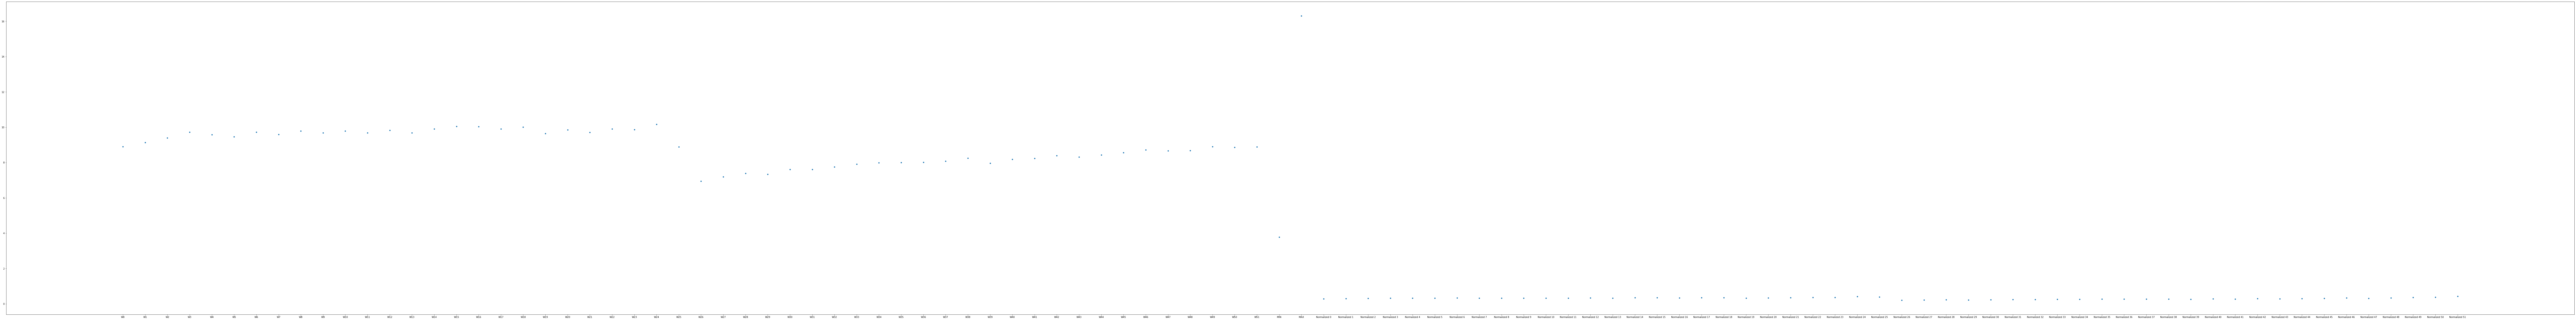

In [ ]:
#plot mean with columns of dataset
plt.figure(figsize=(200,25))
sns.scatterplot(df.columns,mean)

####histogram

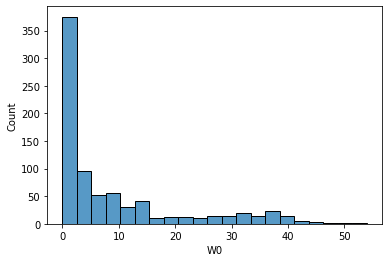

In [ ]:
#histograms
sns.histplot(df['W0'])

In [ ]:
new_columns= iter(df.columns)

In [ ]:
#histogram of all the columns
plt.figure(figsize=(500,10))
for j in range(1,100):
    plt.subplot(1,100,j)
    sns.histplot(df[next(new_columns)])

##Data Preparation

####train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#implementing train_test_split
train,test = train_test_split(df,test_size=0.20,random_state=0)

In [ ]:
train.shape,test.shape

((648, 106), (163, 106))

####normalize the data

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
normalize = Normalizer()

In [ ]:
#normalize the training data
train = normalize.fit_transform(train)

In [ ]:
train

array([[1.32764030e-01, 1.29175813e-01, 1.54293332e-01, ...,
        1.32764030e-03, 3.58821702e-04, 3.58821702e-04],
       [1.23898177e-01, 9.11016004e-02, 1.53050689e-01, ...,
        1.78559137e-03, 7.65253444e-04, 0.00000000e+00],
       [1.42762491e-01, 1.08036480e-01, 1.62054720e-01, ...,
        1.54337828e-04, 1.65913165e-03, 2.70091199e-04],
       ...,
       [1.65147833e-01, 1.39740474e-01, 1.77851513e-01, ...,
        3.93814064e-03, 4.82739820e-03, 4.82739820e-03],
       [1.64254982e-01, 1.36879152e-01, 0.00000000e+00, ...,
        2.73758303e-02, 1.53304650e-02, 1.83418063e-02],
       [0.00000000e+00, 0.00000000e+00, 1.31947825e-01, ...,
        3.29869562e-02, 3.29869562e-02, 1.31947825e-01]])

In [ ]:
#normalize the test data
test = normalize.transform(test )

In [ ]:
test

array([[0.15087244, 0.15087244, 0.07543622, ..., 0.01684742, 0.01684742,
        0.00829798],
       [0.18779333, 0.14606148, 0.06259778, ..., 0.01398017, 0.00918101,
        0.01398017],
       [0.12578711, 0.11361416, 0.1663636 , ..., 0.00186652, 0.00231286,
        0.        ],
       ...,
       [0.        , 0.        , 0.20412415, ..., 0.10206207, 0.        ,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.10482848, 0.20965697,
        0.        ],
       [0.16559153, 0.05519718, 0.08279577, ..., 0.00910753, 0.01214338,
        0.00303584]])

####find the k value

#####elbow method

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#find wcss value 
wcss = []
for i in range(1,10):
   kmeans = KMeans(n_clusters=i,random_state=0)
   kmeans.fit(train)
   wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


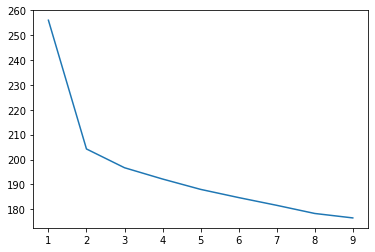

In [ ]:
#plot the wcss value with k-value
sns.lineplot([i for i in range(1,10)],wcss)

##model training

In [ ]:
Kmeans = KMeans(n_clusters=3,random_state=0)

In [ ]:
Kmeans.fit(train)

KMeans(n_clusters=3, random_state=0)

In [ ]:
Kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0,
       0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

In [ ]:
#cluster center of clusters
Kmeans.cluster_centers_

array([[ 1.23183186e-01,  1.26111264e-01,  1.27315172e-01,
         1.31865844e-01,  1.29845323e-01,  1.30690596e-01,
         1.34815044e-01,  1.33530780e-01,  1.32602712e-01,
         1.34178320e-01,  1.31900305e-01,  1.34187397e-01,
         1.32489313e-01,  1.32653153e-01,  1.37975986e-01,
         1.37171834e-01,  1.36522496e-01,  1.37805058e-01,
         1.38960714e-01,  1.34224495e-01,  1.33870154e-01,
         1.34126784e-01,  1.38906743e-01,  1.44797331e-01,
         1.54437019e-01,  1.41329692e-01,  9.57034815e-02,
         9.88937351e-02,  9.97806533e-02,  9.76358199e-02,
         1.02312173e-01,  1.04729377e-01,  1.02268561e-01,
         1.07580966e-01,  1.08234965e-01,  1.10787627e-01,
         1.09536059e-01,  1.11782382e-01,  1.13281487e-01,
         1.07923049e-01,  1.13022549e-01,  1.12223613e-01,
         1.13891007e-01,  1.14462419e-01,  1.14127874e-01,
         1.19107669e-01,  1.20597962e-01,  1.21179619e-01,
         1.20686313e-01,  1.30359713e-01,  1.28230299e-0

####save a model in pickle file

In [ ]:
import pickle

In [ ]:
pickle.dump(Kmeans,open('kmeans.pkl','wb'))

####load the model and make prediction

In [ ]:
model = pickle.load(open('kmeans.pkl','rb'))

In [ ]:
prediction = model.predict(test)

In [ ]:
prediction

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0,
       0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1,
       0, 2, 0, 1, 0, 0, 1, 1, 0], dtype=int32)